<a href="https://colab.research.google.com/github/faspy/data_science_projects/blob/gh-pages/Analisando_os_Dados_do_Airbnb_Tailandia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tailândia*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [118]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

*  id: registro da reserva
*  name: nome do estabelecimento
*  host_id: id to hóspede
*  host_name: nome do hóspede
*  neighbourhood_group: grupo da vizinhança
*  neighbourhood: bairro
*  latitude: coordenada de latitude
*  longitude: coordenada de longitide
*  room_type: tipo de acomodação
*  price: preço da acomodação
*  minimum_nights: mínimo do noites da hospedagem
*  number_of_reviews: número do reviews
*  last_review: último review
*  reviews_per_month: reviews por mês
*  calculated_host_listings_count: quantidade total de hóspedes
*  availability_365: disponibilidade durante o ano
 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [175]:
# mostrar as 5 primeiras entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19709 entries, 0 to 19708
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19709 non-null  int64  
 1   name                            19699 non-null  object 
 2   host_id                         19709 non-null  int64  
 3   host_name                       19707 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19709 non-null  object 
 6   latitude                        19709 non-null  float64
 7   longitude                       19709 non-null  float64
 8   room_type                       19709 non-null  object 
 9   price                           19709 non-null  int64  
 10  minimum_nights                  19709 non-null  int64  
 11  number_of_reviews               19709 non-null  int64  
 12  last_review                     

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [113]:
# identificar o volume de dados do DataFrame
print('Entradas:',df.shape[0])
print('Atributos:',df.shape[1])

# verificar as 5 primeiras entradas do dataset
df.info()

Entradas: 19709
Atributos: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19709 entries, 0 to 19708
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19709 non-null  int64  
 1   name                            19699 non-null  object 
 2   host_id                         19709 non-null  int64  
 3   host_name                       19707 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19709 non-null  object 
 6   latitude                        19709 non-null  float64
 7   longitude                       19709 non-null  float64
 8   room_type                       19709 non-null  object 
 9   price                           19709 non-null  int64  
 10  minimum_nights                  19709 non-null  int64  
 11  number_of_reviews               19709 non-null  int64  
 12  la

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [37]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round(df.isnull().sum()/df.count()*100,1).sort_values(ascending=False)

neighbourhood_group                inf
reviews_per_month                 70.0
last_review                       70.0
name                               0.1
availability_365                   0.0
calculated_host_listings_count     0.0
number_of_reviews                  0.0
minimum_nights                     0.0
price                              0.0
room_type                          0.0
longitude                          0.0
latitude                           0.0
neighbourhood                      0.0
host_name                          0.0
host_id                            0.0
id                                 0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

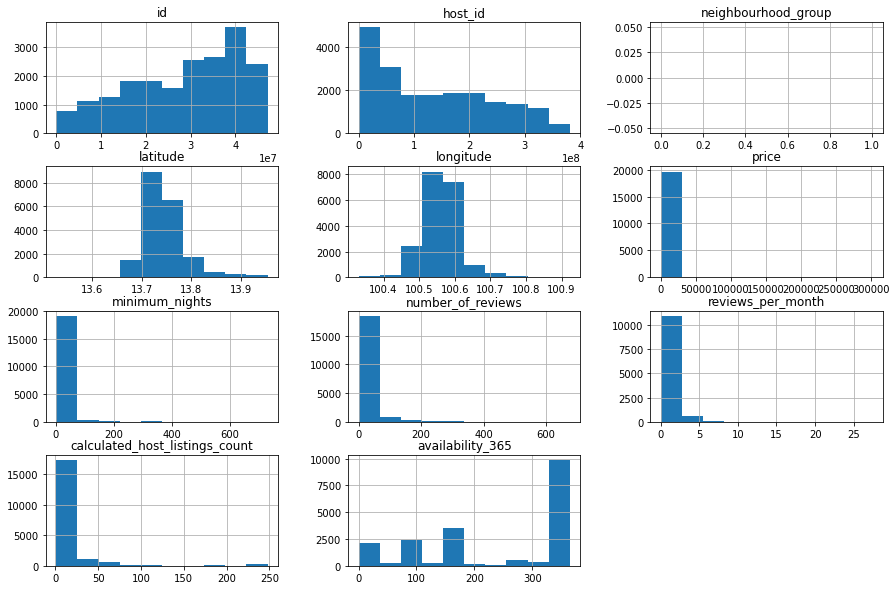

In [115]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,10));

In [129]:
df.info()
df1 = df.drop(columns=['id','name','host_id','host_name','room_type','neighbourhood','neighbourhood_group','last_review'])
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19709 entries, 0 to 19708
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19709 non-null  int64  
 1   name                            19699 non-null  object 
 2   host_id                         19709 non-null  int64  
 3   host_name                       19707 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19709 non-null  object 
 6   latitude                        19709 non-null  float64
 7   longitude                       19709 non-null  float64
 8   room_type                       19709 non-null  object 
 9   price                           19709 non-null  int64  
 10  minimum_nights                  19709 non-null  int64  
 11  number_of_reviews               19709 non-null  int64  
 12  last_review                     

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13.76000,100.54269,1660,3,65,0.61,2,362
1,13.73463,100.47540,906,1,0,NaN,1,0
2,13.66746,100.61540,1148,1,0,NaN,2,358
3,13.80970,100.56527,1057,28,52,0.41,1,364
4,13.75379,100.62422,800,60,0,NaN,1,365


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5,13.82622,100.66940,4528,3,0,NaN,1,0
8,13.74296,100.58621,3019,30,0,NaN,1,0
15,13.75875,100.51500,4400,1,17,0.15,6,298
17,13.79270,100.53968,3626,1,0,NaN,1,365
19,13.73430,100.56324,5887,28,148,1.32,1,362
...,...,...,...,...,...,...,...,...
19651,13.72972,100.52381,4300,1,0,NaN,3,365
19678,13.74342,100.58232,2085,3,0,NaN,3,0
19695,13.74762,100.58047,2085,3,0,NaN,3,365
19701,13.84696,100.65462,3930,1,0,NaN,16,365


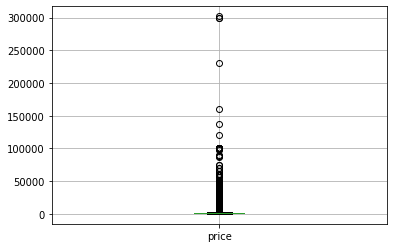

In [174]:
df1.boxplot(column='price');
df1[df1.price>1900]

### **Q4. Qual a média dos preços de aluguel?**

In [161]:
# ver a média da coluna `price``
df1.price.mean()

2078.1542442538944

### **Q4. Qual a correlação existente entre as variáveis**

In [162]:
# criar uma matriz de correlação
mtx = df1.corr().round(2)
# mostrar a matriz de correlação
mtx

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.00,0.07,-0.03,-0.03,-0.01,0.01,-0.03,0.00
longitude,0.07,1.00,-0.02,0.01,-0.02,-0.02,-0.01,-0.04
price,-0.03,-0.02,1.00,0.05,-0.01,-0.01,-0.02,0.01
minimum_nights,-0.03,0.01,0.05,1.00,-0.04,-0.05,0.08,0.05
number_of_reviews,-0.01,-0.02,-0.01,-0.04,1.00,0.85,-0.03,0.01
reviews_per_month,0.01,-0.02,-0.01,-0.05,0.85,1.00,0.05,-0.05
calculated_host_listings_count,-0.03,-0.01,-0.02,0.08,-0.03,0.05,1.00,0.03
availability_365,0.00,-0.04,0.01,0.05,0.01,-0.05,0.03,1.00


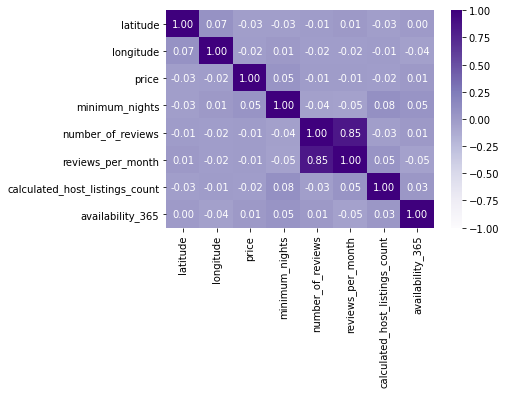

In [163]:
# plotar um heatmap a partir das correlações
sns.heatmap(mtx, annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='Purples');

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Entire home/apt    10962
Private room        6986
Hotel room          1032
Shared room          729
Name: room_type, dtype: int64


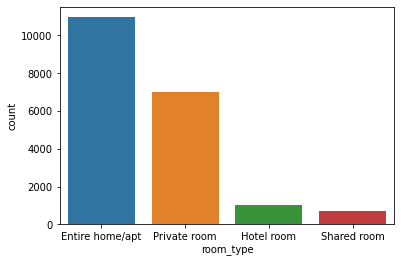

In [90]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df['room_type'].value_counts())
sns.countplot(data=df,x='room_type');

In [94]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(round(df.room_type.value_counts()/df.room_type.count(),2))

Entire home/apt    0.56
Private room       0.35
Hotel room         0.05
Shared room        0.04
Name: room_type, dtype: float64


### **Q6. Qual a localidade mais cara do dataset?**



In [166]:
# ver preços por bairros, na média
df.groupby('neighbourhood').price.mean().round(2).sort_values(ascending=False)

neighbourhood
Taling Chan             6294.66
Bang Khun thain         4013.39
Parthum Wan             3165.37
Dusit                   3160.61
Bang Khae               2871.73
Bang Rak                2708.88
Khlong Toei             2602.89
Yan na wa               2432.78
Nong Chok               2427.58
Vadhana                 2387.75
Sathon                  2373.00
Lat Phrao               2367.69
Khlong San              2250.15
Samphanthawong          2240.17
Saphan Sung             2194.30
Khan Na Yao             2123.74
Din Daeng               2051.70
Pra Wet                 1937.80
Thawi Watthana          1911.06
Bangkok Noi             1903.53
Bueng Kum               1871.97
Khlong Sam Wa           1860.88
Chom Thong              1837.74
Huai Khwang             1832.74
Bang Phlat              1827.77
Phra Nakhon             1772.16
Suanluang               1763.32
Ratchathewi             1746.76
Bangkok Yai             1742.98
Bang Kho laen           1729.52
Pom Prap Sattru Phai    16

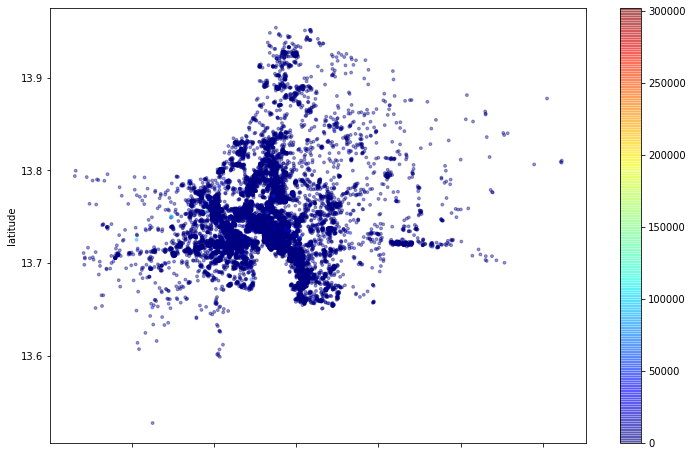

In [171]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));                                                                                                  

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [112]:
# ver a média da coluna `minimum_nights``
round(df.minimum_nights.mean())

11

## Conclusões
